# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Sequential

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

/tmp/ipykernel_31032/1840103041.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


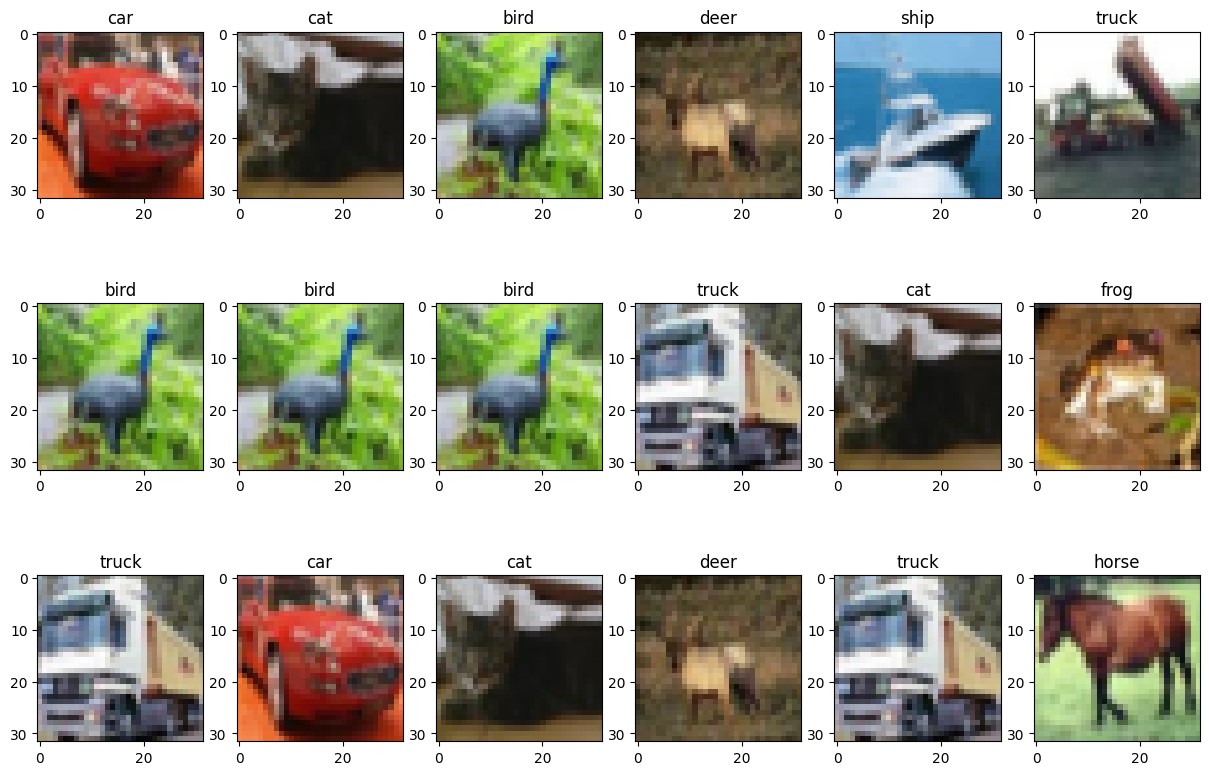

In [52]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class Labels'), Text(0, 0.5, 'Counts'))

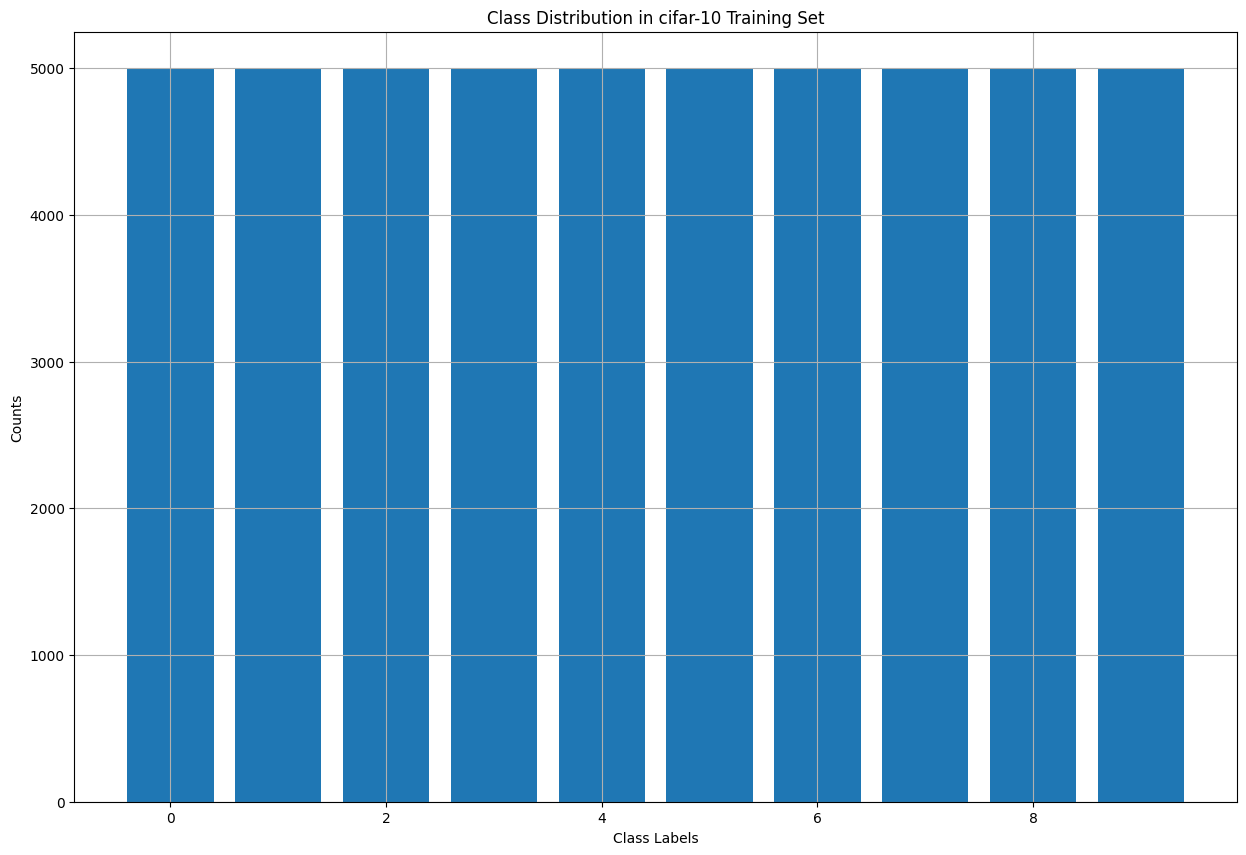

In [9]:
# Compute the class histogram
class_counts = np.bincount(y_train.flatten())
plt.bar(range(10), class_counts), plt.grid(True)
plt.title('Class Distribution in cifar-10 Training Set')
plt.xlabel('Class Labels'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [53]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [37]:
# Build the classifier
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Show the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,162 (1.79 MB)

 Trainable params: 468,778 (1.79 MB)

 Non-trainable params: 384 (1.50 KB)

### Step 3: Training

Compile the model and train it.

In [38]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test)
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 330ms/step - accuracy: 0.3463 - loss: 1.9536 - val_accuracy: 0.1714 - val_loss: 3.9873
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 326ms/step - accuracy: 0.5632 - loss: 1.2204 - val_accuracy: 0.5551 - val_loss: 1.2488
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 324ms/step - accuracy: 0.6483 - loss: 0.9840 - val_accuracy: 0.6696 - val_loss: 0.9504
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 310ms/step - accuracy: 0.6912 - loss: 0.8698 - val_accuracy: 0.7102 - val_loss: 0.8429
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 313ms/step - accuracy: 0.7197 - loss: 0.7976 - val_accuracy: 0.6357 - val_loss: 1.0709
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 311ms/step - accuracy: 0.7400 - loss: 0.7354 - val_accuracy: 0.7308 - val_loss: 0.7834
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 311ms/step - accuracy: 0.7624 - loss: 0.6800 - val_accuracy: 0.6761 - val_loss: 1.0017
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 312ms/step - accuracy: 0.7740 -

Train Acc      0.8903800249099731
Validation Acc 0.7860999703407288


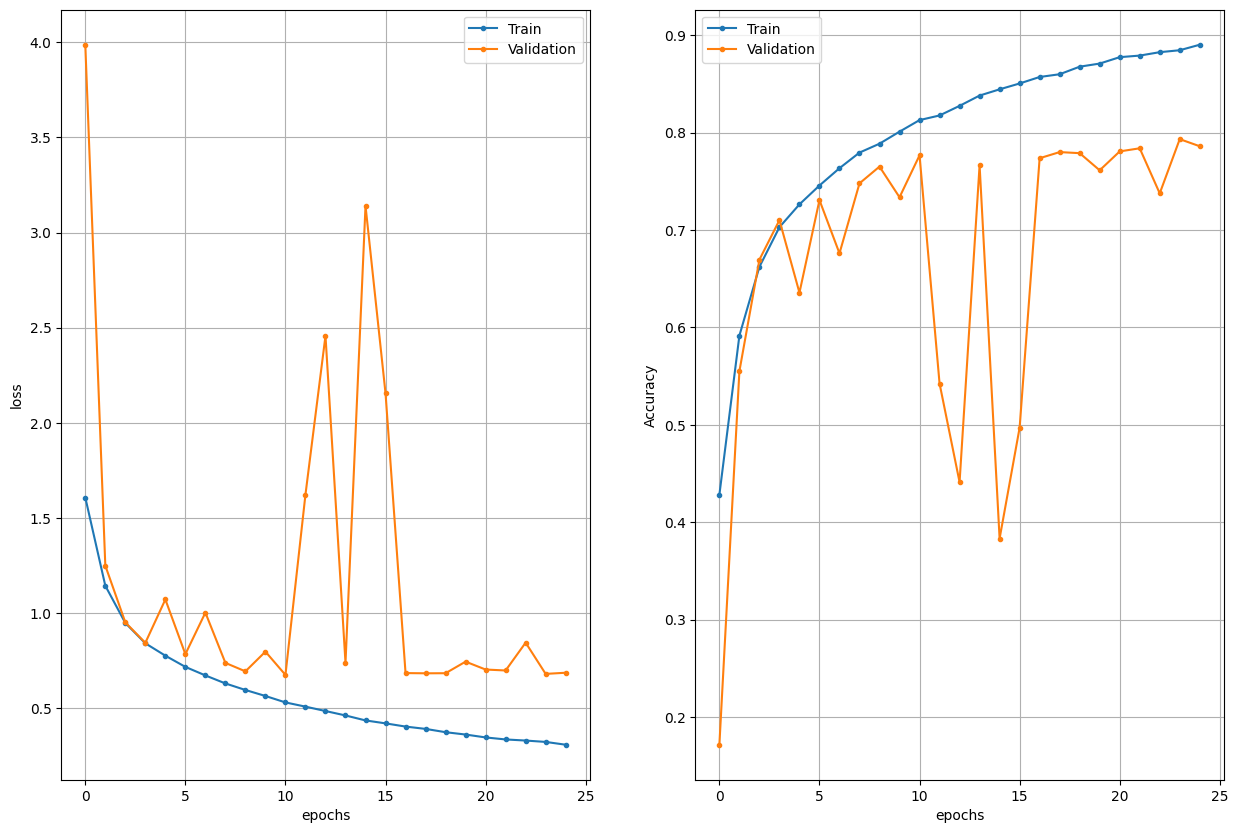

In [39]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [45]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


In [47]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    _indices = np.where(y_true == class_id)[0]
    acc = np.sum(y_pred[_indices] == y_pred[_indices]) / len(_indices)
    print(class_name, acc)

plane 1.0
car 1.0
bird 1.0
cat 1.0
deer 1.0
dog 1.0
frog 1.0
horse 1.0
ship 1.0
truck 1.0


In [48]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7858 - loss: 0.6951
Test loss   0.6857154369354248
Test metric 0.7860999703407288


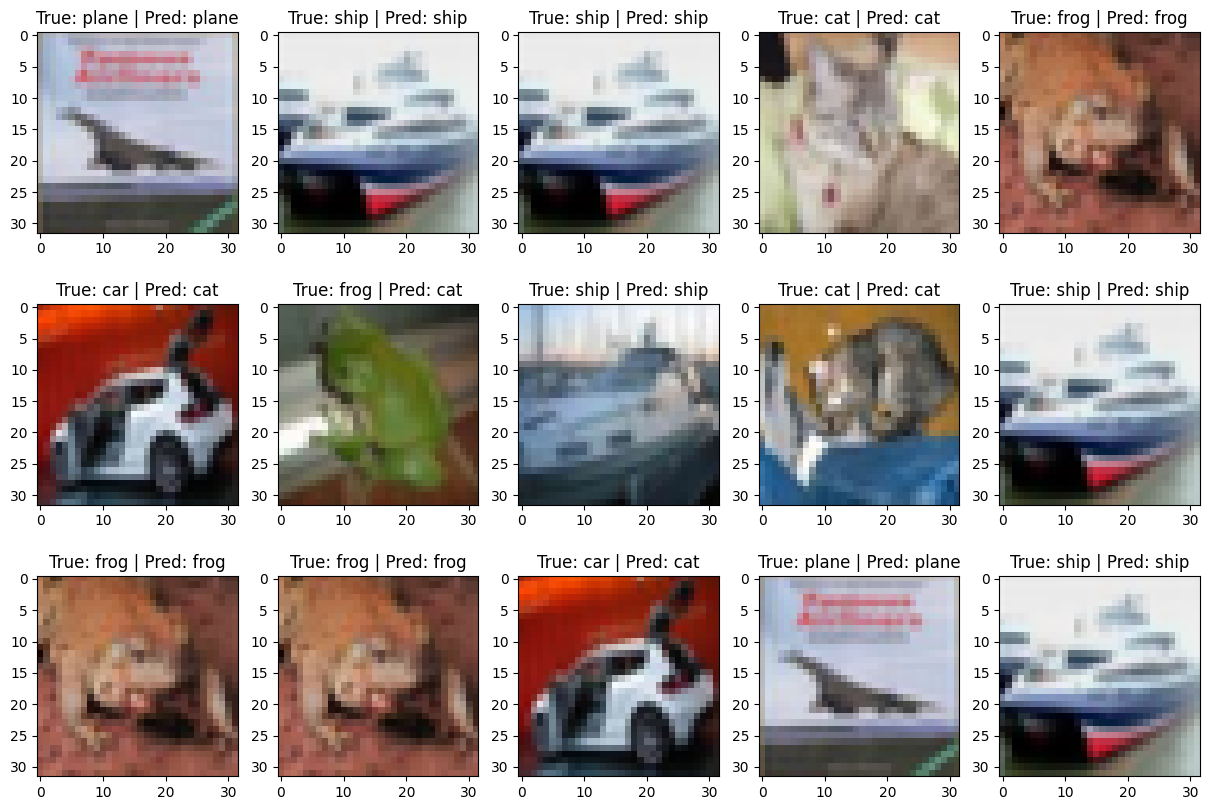

In [54]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### **Questions**
####
#### **What is the overall accuracy of the classifier?**
Общая точность классификатора после улучшений составила 78.6%, в первом варианте (без BatchNormalization и Dropout) - менее 50%
####
#### **What modifications would you do in order to improve the classification accuracy?**
Чтобы повысить точность классификации, можно внести следующие изменения:
  - добавить больше сверточных слоев, чтобы модель могла извлекать более сложные признаки
  - аугментация данных ( вращение, масштабирование, обрезка или отражение изображений)
  - добавить регуляризацию L2 или Dropout
  - оптимизировать параметры модели, например, найти оптимальных значений для размера фильтров, функции активации, размера батча и т.д.
  - увеличить количество эпох
####
#### **Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?**
Были использованы методы регуляризации. А именно, добавлена нормализация данных на уровне мини-батчей (BatchNormalization) и случайное обнуление нейронов во время обучения (Dropout). Это повысило точность с 50% до 78,6%